** 기존 코드 **

In [ ]:
### Context
#This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

### Content
'''
**price** price in US dollars (\\$326--\\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)
'''

# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
# loding the csv file as pandas dataframe

#from google.colab import drive
#drive.mount('/content/drive')

# 데이터 디렉토리 경로 설정
data_dir = '/content/diamonds.csv'

diamonds = pd.read_csv(data_dir)
# Looking at the loaded data
print(diamonds.head(2))

# dropping the first column
diamonds = diamonds.drop(diamonds.columns[0], axis=1)

# code to directly delete first column, while loding the data from csv file
# diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv').iloc[:,1:]
diamonds.head()
# checking the datatypes and null values in the data
diamonds.info()
#**From the above, we can see that there are no null values in our dataset.**
# if there are null values presents in the data, then we can use imputer for filling those null values
# from sklearn.preprocessing import Imputer
# checking for the unique values and their total counts in the dataset,
# to get an insight about categorical and numerical variables in the dataset
for i in diamonds:
    print(diamonds[i].value_counts())

# defining the variables into Categorical and Numerical
#**Categorical Variables :** cut, color, clarity
#*Numerical Variables :** carat, depth, table, price, x, y, z
# defining the variables into Dependent and Independent
#**Dependent Variable :** price
#**Independent Variable :** carat, cut, color, clarity, depth, table, x, y, z
# Now we will see the distribution of variables
d_cat = diamonds[['cut', 'color', 'clarity']]
d_num = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
d_num.describe()
#From the above graph we can see that there are many outliers present in our data, thus outlier treatment is necessary,
#but here, the target variable is Price and as we are predicting price of diamonds, then extreme values are possible, depending about the dimentions of the diamonds.
diamonds.price.describe()

# encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])
diamonds.dtypes
#**Splitting the data into train and test**
# Splitting the data into dependent and independent variables
X=diamonds.drop('price', axis=1)
y=diamonds['price']

# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)



from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=X_train.columns)

#**Now we can see that the values of all independent variables lie in a comparable range**
#**Now our data is ready to fit into regression model**

# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
#mean_absolute_percentage_error
print("\nMean Absolute Percentage Error for Train:", metrics.mean_absolute_percentage_error(y_pred_train,y_train))
print("Mean Absolute Percentage Error for Test:", metrics.mean_absolute_percentage_error(y_pred_test,y_test))




   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   

      z  
0  2.43  
1  2.31  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65 

### `**여기서부터 코드 추가함!**`


**전처리**
1. 독립변수 X, 종속변수 Y 정의
2. 범주형 변수 one-hot encoding
3. min-max 스케일링 수행

In [ ]:
# Splitting the data into log(dependent) and independent variables
data_dir = '/content/diamonds.csv'
#data_dir = '/content/drive/MyDrive/diamonds.csv'

diamonds = pd.read_csv(data_dir)
# 첫번째 열 삭제
diamonds = diamonds.drop(diamonds.columns[0], axis=1)

# 독립변수 X, 종속변수 Y 정의
X = diamonds.drop('price', axis=1)
y=diamonds['price']
#y=y.transform(lambda X: np.log(X))

# 범주형 변수 one-hot encoding
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])
X.dtypes

# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

전처리 확인

In [ ]:
print('X_data: ', X_scaled_df.head(3))
print('y_data: ', y.head(3))

X_data:        carat   cut     color   clarity     depth     table         x         y  \
0  0.006237  0.50  0.166667  0.428571  0.513889  0.230769  0.367784  0.067572   
1  0.002079  0.75  0.166667  0.285714  0.466667  0.346154  0.362197  0.065195   
2  0.006237  0.25  0.166667  0.571429  0.386111  0.423077  0.377095  0.069100   

          z  
0  0.076415  
1  0.072642  
2  0.072642  
y_data:  0    326
1    326
2    327
Name: price, dtype: int64


** 모델 건설 준비 **
1. train:test데이터 비율 설정 85:15
2. activation fuctions별 성능 실험

In [ ]:
# 데이터 셋 분할
from sklearn.model_selection import train_test_split, KFold
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled_df, y, test_size=0.15, random_state=1)

print('X_train_full size :', X_train_full.shape)
print('X_test size :', X_test.shape)
print('y_train_full size :', y_train_full.shape)
print('y_test size :', y_test.shape)

X_train_full size : (45849, 9)
X_test size : (8091, 9)
y_train_full size : (45849,)
y_test size : (8091,)


In [ ]:
# 활성화 함수 실험
from sklearn.neural_network import MLPRegressor
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

for activation in activation_functions:
    regr = MLPRegressor(activation=activation, hidden_layer_sizes=(50, 30), random_state=1, max_iter=500).fit(X_train_full, y_train_full)

    # 훈련 및 테스트 데이터에 대한 R^2 점수 출력
    print(f'Activation function: {activation}')
    print(f'R^2 score for Train: {regr.score(X_train_full, y_train_full)}')
    print(f'R^2 score for Test: {regr.score(X_test, y_test)}')

    # 예측값 생성
    y_pred_train = regr.predict(X_train_full)
    y_pred_test = regr.predict(X_test)

    # 평균 절대 오차 계산 및 출력
    print("Mean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train, y_train_full))
    print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test, y_test))

    # 평균 절대 퍼센트 오차 계산 및 출력
    print("Mean Absolute Percentage Error for Train:", metrics.mean_absolute_percentage_error(y_pred_train, y_train_full))
    print("Mean Absolute Percentage Error for Test:", metrics.mean_absolute_percentage_error(y_pred_test, y_test))
    print("-" * 50)

Activation function: identity
R^2 score for Train: 0.8846022329434741
R^2 score for Test: 0.8861715248636575
Mean Absolute Error for Train: 867.7601432555078
Mean Absolute Error for Test: 857.6730662780874
Mean Absolute Percentage Error for Train: 3.0474323289012712
Mean Absolute Percentage Error for Test: 2.070698680334101
--------------------------------------------------
Activation function: logistic
R^2 score for Train: -0.016132716465534935
R^2 score for Test: -0.015884539688853616
Mean Absolute Error for Train: 2923.2125588296044
Mean Absolute Error for Test: 2863.513883186326
Mean Absolute Percentage Error for Train: 0.8530755516298664
Mean Absolute Percentage Error for Test: 0.8356538008570275
--------------------------------------------------
Activation function: tanh
R^2 score for Train: -0.015020677225138446
R^2 score for Test: -0.014763255314010904
Mean Absolute Error for Train: 2926.687863201699
Mean Absolute Error for Test: 2866.9969109762988
Mean Absolute Percentage Erro

** 모델건설 **
1. train:test데이터 비율 설정 85:15
2. K-fold Cross-Validation (5-fold) 수행
  - 교차검증을 통해 활성화 함수의 성능평가
3. MAE를 기준으로 가장 성능이 좋은 활성화 함수를 선택
4. 선택한 활성화 함수를 사용하여 최종 모델 학습
5. 최종 모델을 테스트 데이터에서 평가

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np
import pandas as pd

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Variables to store scores for each fold
train_scores = []
val_scores = []
train_mae = []
val_mae = []
train_mape = []
val_mape = []

# Create the K-Fold validation sets
for fold, (train_index, val_index) in enumerate(skf.split(X_train_full, y_train_full)):
    X_train_fold, X_val_fold = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    regr = MLPRegressor(hidden_layer_sizes=(50, 30), random_state=1, max_iter=500).fit(X_train_fold, y_train_fold)

    train_score = regr.score(X_train_fold, y_train_fold)
    val_score = regr.score(X_val_fold, y_val_fold)

    y_pred_train_fold = regr.predict(X_train_fold)
    y_pred_val_fold = regr.predict(X_val_fold)

    train_mae_fold = metrics.mean_absolute_error(y_pred_train_fold, y_train_fold)
    val_mae_fold = metrics.mean_absolute_error(y_pred_val_fold, y_val_fold)

    train_mape_fold = metrics.mean_absolute_percentage_error(y_pred_train_fold, y_train_fold)
    val_mape_fold = metrics.mean_absolute_percentage_error(y_pred_val_fold, y_val_fold)

    train_scores.append(train_score)
    val_scores.append(val_score)
    train_mae.append(train_mae_fold)
    val_mae.append(val_mae_fold)
    train_mape.append(train_mape_fold)
    val_mape.append(val_mape_fold)

    print(f'Fold {fold + 1}')
    print('Train R^2 score:', train_score)
    print('Validation R^2 score:', val_score)
    print('Train MAE:', train_mae_fold)
    print('Validation MAE:', val_mae_fold)
    print('Train MAPE:', train_mape_fold)
    print('Validation MAPE:', val_mape_fold)
    print('')

# Average scores across all folds
print('Average Train R^2 score:', np.mean(train_scores))
print('Average Validation R^2 score:', np.mean(val_scores))
print('Average Train MAE:', np.mean(train_mae))
print('Average Validation MAE:', np.mean(val_mae))
print('Average Train MAPE:', np.mean(train_mape))
print('Average Validation MAPE:', np.mean(val_mape))


Fold 1
Train R^2 score: 0.9455905262141319
Validation R^2 score: 0.943959550073188
Train MAE: 510.9694704924689
Validation MAE: 514.0940162943297
Train MAPE: 0.14177326508572013
Validation MAPE: 0.13549067914679108

Fold 2
Train R^2 score: 0.9660078839667989
Validation R^2 score: 0.968413499710451
Train MAE: 413.8672726421285
Validation MAE: 406.59893712969307
Train MAPE: 0.12662317444995969
Validation MAPE: 0.12876513653565097

Fold 3
Train R^2 score: 0.930303477587358
Validation R^2 score: 0.9340029109865405
Train MAE: 575.7004171796083
Validation MAE: 562.5121624673142
Train MAPE: 0.18448459931641675
Validation MAPE: 0.15873546896209315

Fold 4
Train R^2 score: 0.9329434002908016
Validation R^2 score: 0.9241366236559394
Train MAE: 564.1666703918443
Validation MAE: 581.2572011145863
Train MAPE: 0.15957039625635033
Validation MAPE: 0.30559392297045795

Fold 5
Train R^2 score: 0.9320675531236191
Validation R^2 score: 0.934014062641846
Train MAE: 563.2011258640237
Validation MAE: 565.05

In [ ]:
# Final evaluation on the test set
regr = MLPRegressor(hidden_layer_sizes=(50, 30), random_state=1, max_iter=500).fit(X_train_full, y_train_full)
test_score = regr.score(X_test, y_test)
y_pred_test = regr.predict(X_test)

print(f'\nR^2 score for Test using mlp: {test_score}')
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test, y_test))
print("Mean Absolute Percentage Error for Test:", metrics.mean_absolute_percentage_error(y_pred_test, y_test))



R^2 score for Test using mlp: 0.9618377048756195
Mean Absolute Error for Test: 441.45987473412015
Mean Absolute Percentage Error for Test: 0.24844067488966004


**MLP 성능 확인**
1. RELU 함수 사용
 - identity, logistic, tanh 활성화 함수는 성능이 좋지 않아 사용하지 않음.
2. 2개의 Hidden layer를 가지는 MLP 구현
3. 레이어별 50, 30개의 노드 사용

**결과 비교 (Linear Regression vs Neural Network)**
- R2 SCORE: 0.88  → 0.96
- MAE     : $853 → $441
- MAPE    : 1.48  → 0.24



사용된 하이퍼 파라미터

In [ ]:
print("Hidden layer sizes:", regr.hidden_layer_sizes)
print("Activation function:", regr.activation)
print("Solver:", regr.solver)
print("Alpha (L2 regularization strength):", regr.alpha)
print("Learning rate schedule:", regr.learning_rate)
print("Maximum number of iterations:", regr.max_iter)
print("Random state:", regr.random_state)

Hidden layer sizes: (50, 30)
Activation function: relu
Solver: adam
Alpha (L2 regularization strength): 0.0001
Learning rate schedule: constant
Maximum number of iterations: 500
Random state: 1


**SHAP 방법론을 활용한 결과 해석**


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.3 MB/s eta 0:00:00


  0%|          | 0/8091 [00:00<?, ?it/s]

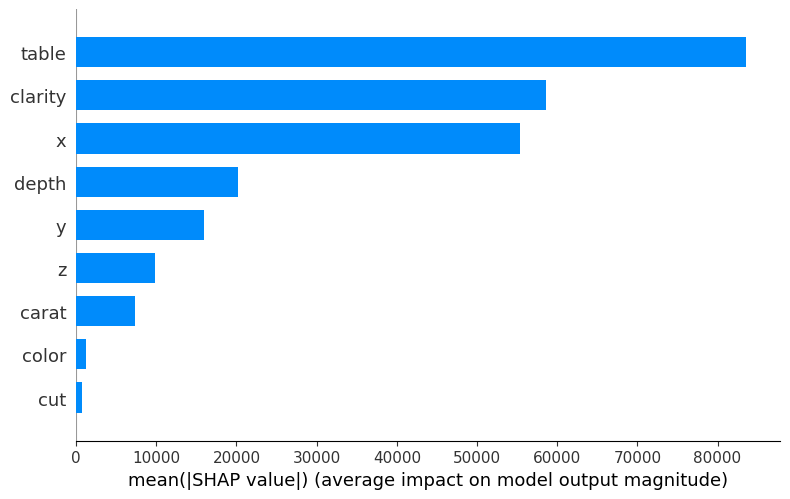

In [ ]:
import shap
import matplotlib.pyplot as plt

# MLPRegressor의 경우 SHAP explainer에서 직접적으로 지원되지 않는 모델 유형이므로, KernelExplainer를 사용
# 학습 데이터셋에서 일부 샘플을 선택하여 사용 (속도 향상을 위해)
X_sample = shap.sample(X_train, 100)

# KernelExplainer 생성
explainer = shap.KernelExplainer(regr.predict, X_sample)
shap_values = explainer.shap_values(X_test, nsamples=100)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")